In [1]:
import csv
import os

%load_ext autoreload
%autoreload 2

In [11]:
import data_processing as dp
import datetime as dt

char_set={'q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m',\
#         'Q','W','E','R','T','Y','U','I','O','P','A','S','D','F','G','H','J','K','L','Z','X','C','V','B','N','M',\
          '<bcksp>','spc'}
input_case=['all']
log_buffer=dt.timedelta(seconds=1)

log_data,lh_accel,lh_gyro,lh_gravity,rh_accel,rh_gyro,rh_gravity=dp.preprocess_data(char_set,input_case,log_buffer)
# print shapes
print "log_data shape:",log_data.shape
print "lh_accel shape:",lh_accel.shape
print "lh_gyro shape:",lh_gyro.shape
print "lh_gravity shape:",lh_gravity.shape
print "rh_accel shape:",rh_accel.shape
print "rh_gyro shape:",rh_gyro.shape
print "rh_gravity shape:",rh_gravity.shape

total number of files in  library : 8
Successfully completed 1 files
Successfully completed 2 files
Successfully completed 3 files
Successfully completed 4 files
Successfully completed 5 files
Successfully completed 6 files
Successfully completed 7 files
Successfully completed 8 files
total number of files in  room : 9
total number of files in  room2 : 4
Successfully completed 1 files
Successfully completed 2 files
Successfully completed 3 files
Successfully completed 4 files
total number of files in  room3 : 3
Successfully completed 1 files
Successfully completed 2 files
total number of files in  room4 : 8
Successfully completed 1 files
Successfully completed 2 files
total number of files in  room5 : 7
Successfully completed 1 files
Successfully completed 2 files
total number of files in  room6 : 3
Successfully completed 1 files
Successfully completed 2 files
Successfully completed 3 files
total number of files in  room7 : 2
Successfully completed 1 files
log_data shape: (21710, 3)
lh

IOError: cannot write mode RGBA as JPEG

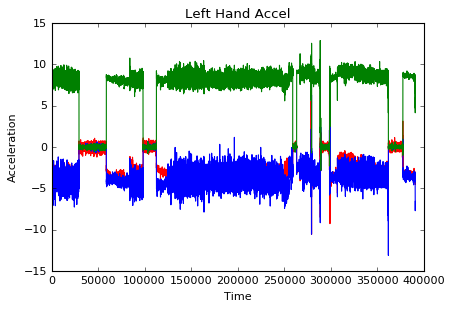

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
num_samples=rh_accel.shape[0]
plt.plot(range(num_samples),rh_accel[:,1],'r-',range(num_samples),rh_accel[:,2],'b-',range(num_samples),rh_accel[:,3],'g-')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Left Hand Accel')
plt.savefig('accel_data.jpg')
plt.show()

In [17]:
import numpy as np
import process_for_rnn as pfr
import pickle
window_time=dt.timedelta(microseconds=500000)
Xtr, ytr, Xva, yva, Xte, yte, DXtr, Dytr, DXva, Dyva, DXte, Dyte, char_to_indx, indx_to_char=\
        pfr.process_data_for_rnn(log_data,lh_accel,\
        lh_gyro,lh_gravity,rh_accel,rh_gyro,rh_gravity,char_set,0.1,0.1,data_sampling='random',window_time=window_time)

# print data shape
print "Xtr shape:",Xtr.shape
print "ytr shape:",ytr.shape
print "Xva shape:",Xva.shape
print "yva shape:",yva.shape
print "Xte shape:",Xte.shape
print "yte shape:",yte.shape
print "len(char_to_indx):",len(char_to_indx)
print "len(indx_to_char):",len(indx_to_char)

Completed iteration  400 / 21710
Completed iteration  2000 / 21710
omitting keylog instance: ['<START>', 'a', '<END>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>']
omitting keylog instance: ['<START>', 'o', 'f', '<END>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>']
omitting keylog instance: ['<START>', 't', 'h', 'i', 's', '<END>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>']
omitting keylog instance: ['<START>', 'f', 'e', 'b', 'r', 'u', 'a', 'r', 'y', '<END>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>']
omitting keylog instance: ['<START>', 'b', 'e', '<END>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>', '<NULL>']
Completed iteration  2400 / 21710

In [18]:
data=dict()
data['X_train']=Xtr
data['y_train']=ytr
data['X_val']=Xva
data['y_val']=yva
data['X_test']=Xte
data['y_test']=yte
data['DX_train']=DXtr
data['Dy_train']=Dytr
data['DX_val']=DXva
data['Dy_val']=Dyva
data['DX_test']=DXte
data['Dy_test']=Dyte
data['word_to_idx']=char_to_indx
data['idx_to_word']=indx_to_char
data['train_features']=Xtr
data['train_captions']=ytr
data['val_features']=Xva
data['val_captions']=yva
data['test_features']=Xte
data['test_captions']=yte
pickle.dump(data, open( "0.5s_rnn_rand.p", "wb" ) )
print "Done"

Done


In [19]:
print Dyte

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
